# Clusterização do DataFrame 'Car Sales'

### Sobre os dados

O DataFrame Car Sales está no formato .csv e contém informações técnicas sobre veículos de diversas marcas, assim como seu valor de mercado, valor de revenda, unidades vendidas, entre outros. Uma base de dados robusta e repleta de opções para utilizar algoritmos de clusterização.

### Proposta

Minha proposta com este trabalho é efetuar a clusterização dos dados utilizando os métodos PCA (Principal Component Analysis) e  DSCAN (Density-Based Spatial Clustering of Applications with Noise).

Dentre os meus objetivos neste estudo, destaco: 

- Utilizar bibliotecas voltadas para machine learning a fim de me familiarizar com algoritmos de clusterização
- Efetivamente promover a clusterização da base de dados através dos algoritmos acima citados
- Usar o resultado do agrupamento para extrair insights sobre a base de dados

### Mãos à obra

In [1]:
#IMPORTAÇÃO DE PACOTES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

### 1 - Preparação dos Dados

### Coleta do Dados

In [131]:
#CARREGAMENTO DOS DADOS E DEFINIÇÃO DA VARIÁVEL CAR MODEL COMO INDEX

data = pd.read_csv('S:\_DataScience\Car Sales - Kaggle\Car_sales.csv', index_col = 1)
data.index.name = None

In [132]:
# VERIFICAÇÃO DAS VARIÁVEIS DA BASE DE DADOS
data.head(1)

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Integra,Acura,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.28015


In [133]:
# IMPRESSÃO DO NOME DAS COLUNAS DA BASE DE DADOS
data.columns

Index(['Manufacturer', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [134]:
# VERIFICANDO SE TODOS OS VALORES ESTÃO COMPLETOS OU TENHO VALORES NULOS
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Integra to S80
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Sales_in_thousands   157 non-null    float64
 2   __year_resale_value  121 non-null    float64
 3   Vehicle_type         157 non-null    object 
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Latest_Launch        157 non-null    object 
 14  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(3)
memory usage:

In [135]:
# VERIFICANDO A RELEVÂNCIA DA VARIÁVEL VEHICLE TYPE
unique_type = data['Vehicle_type'].unique()

for i in unique_type:
    print(i)

Passenger
Car


Por se tratar de uma variável qualitativa com apenas dois valores irrelevantes, Vehicle Type não fará nenhuma diferença no estudo

### Limpeza dos Dados

In [136]:
# PREENCHENDO AS OBSERVAÇÕES NULAS COM A MÉDIA DAS VARIÁVEIS PARA PODER APLICAR MODELO DE CLUSTERIZAÇÃO
columns_to_fill = ['__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']

imputer = SimpleImputer(strategy='mean')

for column in columns_to_fill:
    data[column] = imputer.fit_transform(data[[column]])

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Integra to S80
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Sales_in_thousands   157 non-null    float64
 2   __year_resale_value  157 non-null    float64
 3   Vehicle_type         157 non-null    object 
 4   Price_in_thousands   157 non-null    float64
 5   Engine_size          157 non-null    float64
 6   Horsepower           157 non-null    float64
 7   Wheelbase            157 non-null    float64
 8   Width                157 non-null    float64
 9   Length               157 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        157 non-null    float64
 12  Fuel_efficiency      157 non-null    float64
 13  Latest_Launch        157 non-null    object 
 14  Power_perf_factor    157 non-null    float64
dtypes: float64(12), object(3)
memory usage:

In [138]:
#ADICIONANDO A MÉDIA DO VALOR DAS OBSERVAÇÕES DA VARIÁVEL Curb_Weight PARA AS OBSERVAÇÕES NÃO NULAS, MAS SEM VALOR DECIMAL
data['Curb_weight'].fillna(data['Curb_weight'].mean(), inplace=True)

Para esta análise, não irei trabalhar com nenhuma variável qualitativa pois não representam nenhuma grande diferença nos meus dados. O modelo de cada veículo será utilizado apenas como rótulo para as análises. A fabricante, assim como o tipo de veículo, que se resume nos tipos 'carro' e 'passageiro', não trazem nada significativo para este estudo de clusterização. 

### Transformação dos Dados

In [139]:
# CRIANDO UM NOVO DATASET COM AS VARIÁVEIS QUANTITATIVAS

data_quanti = data.copy()
data_quanti = data.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,14]]

In [140]:
data_quanti.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Integra,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
TL,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
CL,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
RL,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
A4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


### Gráfico de Correlação

In [141]:
#CRIAÇÃO DE UM GRÁFICO DE CORRELAÇÃO PARA TENTAR OBTER ALGUM INSIGHT SOBRE OS DADOS QUE ESTÃO SENDO ANALISADOS

correlation_matrix = data_quanti.corr()


fig = px.imshow(correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns)
fig.update_layout(title='Gráfico de Correlação de Variáveis Quantitativas')
fig.show()

Pouco além do óbvio pode ser explicado através do gráfico de correlação. 

- Quanto maior a performance, maior o valor. 
- Quanto maior a performance, maior a cavalaria do veículo.
- Quanto maior a largura, maior o tamanho do motor.
- Quanto maior a capacidade de combustível, maior o peso bruto.
- Quanto maior o peso do motor, maior a cavalaria.

Nosso gráfico de correlação não responde nada relevante quanto as variáveis quantitativas da base de dados. Porém algo interessante pode ser observado em relação a correlação negativa. A eficiência do combustível é negativa quanto maior for a capacidade de combustível e o peso bruto.

### Padronização dos Dados

In [142]:
# PADRONIZAÇÃO DAS VARIÁVEIS UTILIZANDO SCALER

scaler = StandardScaler()

data_quanti_std = scaler.fit_transform(data_quanti)

data_quanti_std

array([[-0.53204229, -0.17107102, -0.41443696, ..., -1.23008725,
         0.98298105, -0.75351287],
       [-0.20076081,  0.17996421,  0.07100423, ..., -0.19464351,
         0.27339161,  0.57535923],
       [-0.5734064 ,  0.01518238,  0.        , ..., -0.19464351,
         0.50992142,  0.        ],
       ...,
       [-0.5230174 ,  0.        ,  0.09914575, ..., -0.01344086,
         0.27339161, -0.23643811],
       [-0.73002962,  0.        ,  1.27405414, ...,  0.1418757 ,
        -0.19966803,  0.9870881 ],
       [-0.50181184,  0.        ,  0.60569308, ...,  0.81491414,
         0.03686179,  0.34906078]])

## 2 - Clusterização

### Utilização do método Elbow para ajudar a defininir número de clusters

In [143]:
# APLICAÇÃO DO METODO ELBOW UTILIZANDO OS DADOS PADRONIZADOS

inertia = []

K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state = 0 )
    kmeans.fit(data_quanti_std)
    inertia.append(kmeans.inertia_)

F:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

F:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

F:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

F:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

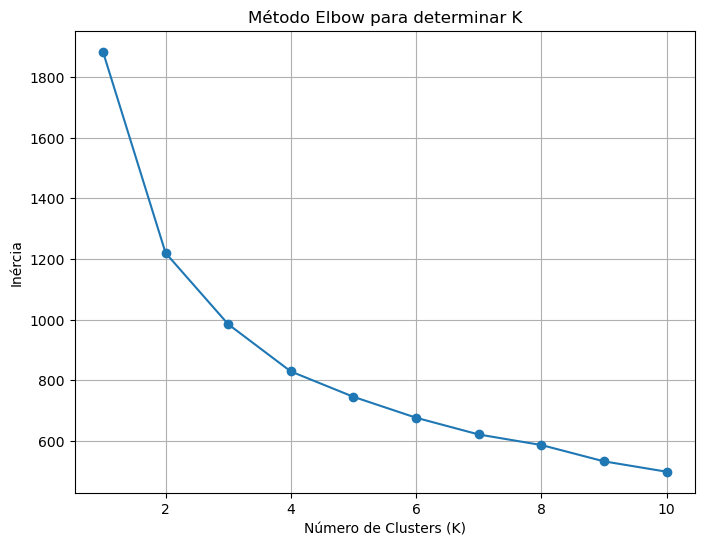

In [144]:
#PLOTANDO A REPRESENTAÇÃO GRÁFICA DO ELBOW

plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.title('Método Elbow para determinar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

Utilizando o método Elbow para me auxiliar na escolha do número de clusters para a minha análise, conclui que 2 clusters serão suficientes para explicar grande parte do trabalho.

In [145]:
#DEFININDO O NÚMERO DE CLUSTERS

kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(data_quanti_std)

F:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

F:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=2, random_state=0)

In [146]:
#EXTRAINDO CENTROIDS E RÓTULOS DA VARIÁVEL kmeans
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [147]:
#ADICIONANDO OS CLUSTERS A UM NOVO DATASET

data_quanti['Clusters'] = labels
data_quanti_cluster = data_quanti.copy()

C:\Users\Filiphe\AppData\Local\Temp\ipykernel_9876\2355683021.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
data_quanti_cluster.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Clusters
Integra,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1
TL,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,0
CL,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591,0
RL,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,0
A4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1


### Clusterização utilizando método PCA

In [149]:
# UTILIZANDO A BIBLIOTECA SKLEARN PARA CRIAR A VARIÁVEL pca COM DOIS COMPONENTES DEFINIDOS POR MÉTODOS DE CLUSTERIZAÇÃO (ELBOW)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_quanti_cluster)

In [150]:
# ADICIONANDO OS RESULTADOS AO MEU DATAFRAME

data_quanti_cluster['PC1'] = data_pca[:, 0]
data_quanti_cluster['PC2'] = data_pca[:, 1]

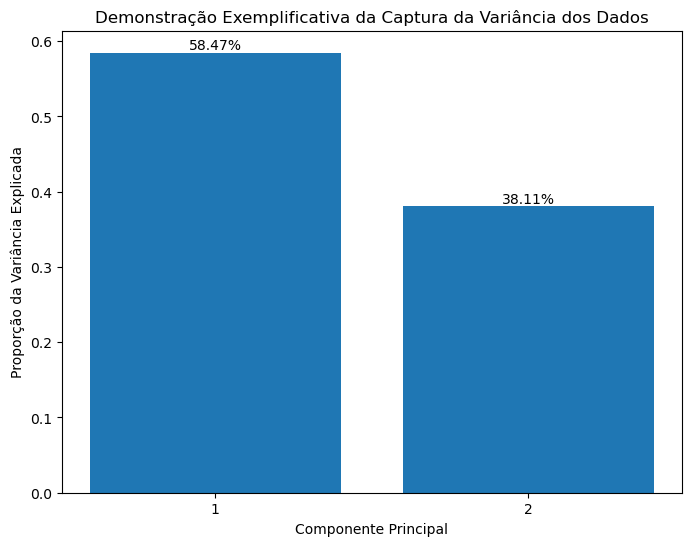

In [173]:
# PLOTAGEM DE GRÁFICO PARA EXPLICAR A VARIÂNCIA DOS COMPONENTES PRINCIPAIS

explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), explained_variance_ratio[:2], align='center')
plt.xticks(range(1, 3), [1, 2])

for i, pct in enumerate(explained_variance_ratio):
    plt.text(i + 1, pct, f'{pct*100:.2f}%', ha='center', va='bottom')

plt.xlabel('Componente Principal')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Demonstração Exemplificativa da Captura da Variância dos Dados')
plt.show()

A utilização de apenas dois componentes é o suficiente para explicar mais de 95% da estrutura dos meus dados.

In [175]:
# VERIFICANDO O VALOR DOS VETORES E A CONTRIBUIÇÃO DE TODAS AS VARIÁVEIS CORRESPONDENTES  

print(np.round(pca.components_[0],3))
print(np.round(pca.components_[1],3))

[ 0.813 -0.079 -0.132 -0.006 -0.511  0.014 -0.007  0.001 -0.003 -0.01
  0.017 -0.232  0.003]
[ 0.574  0.077  0.135  0.013  0.725  0.066  0.034  0.122  0.006  0.034
 -0.041  0.312 -0.005]


In [154]:
# GRÁFICOS DE DISPERSÃO COM EIXOS DOS PC1 E PC2 EVIDENCIANDO FORMAÇÃO DOS CLUSTERS

fig = px.scatter(data_quanti_cluster, x='PC1', y='PC2', color='Clusters', custom_data=[data_quanti_cluster.index], title='Análise PCA em 3D')
fig.update_traces(textposition='top center')  # Adicionar nomes dos pontos ao gráfico
fig.update_traces(hovertemplate='%{customdata[0]}')

fig.show()

Neste gráfico é possível encontrar alguns outliers e também verificar como ocorre a dispersão entre as todas as observações da nossa base de dados em relação aos componentes principais encontrados no estudo.

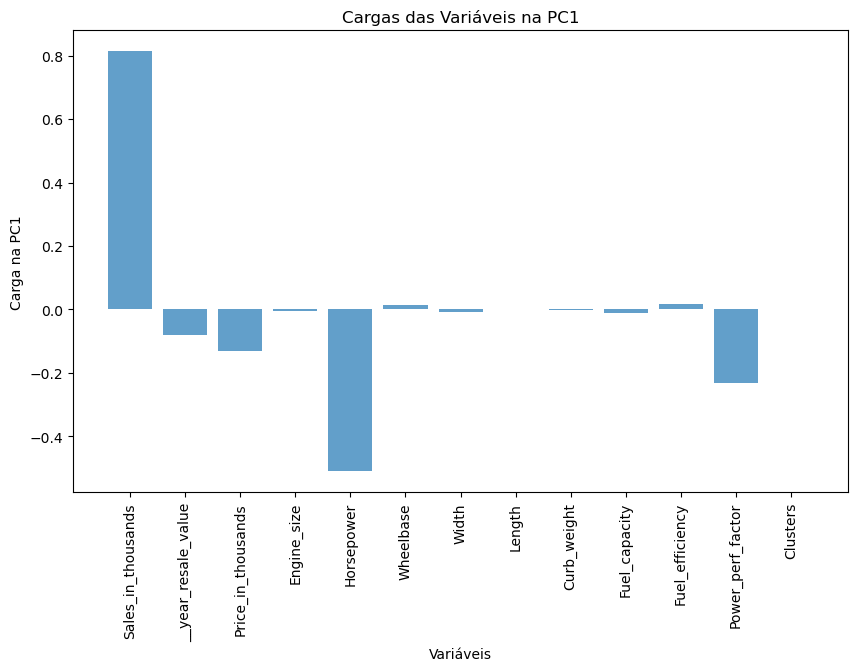

In [155]:
#GRÁFICO DAS CARGAS DAS VARIÁVEIS PC1

variable_loadings = pca.components_[:2]  
variable_names = data_quanti.columns

# Plotagem das cargas de variáveis na PC1
plt.figure(figsize=(10, 6))
plt.bar(range(len(variable_names)), variable_loadings[0], tick_label=variable_names, alpha=0.7)
plt.title('Cargas das Variáveis na PC1')
plt.xlabel('Variáveis')
plt.ylabel('Carga na PC1')

plt.xticks(range(len(variable_names)), variable_names, rotation='vertical')

plt.show()

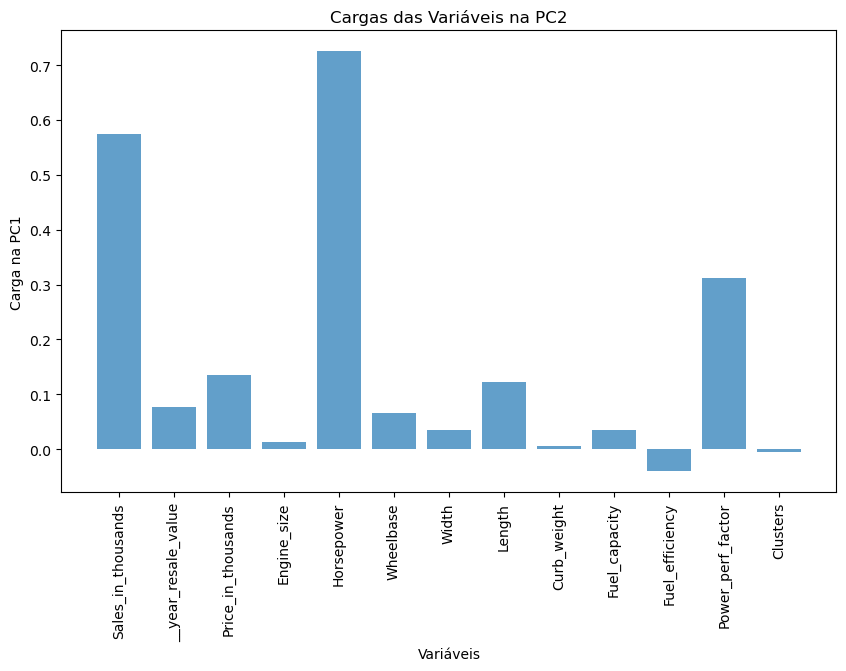

In [157]:
#GRÁFICO DAS CARGAS DAS VARIÁVEIS PC2

variable_loadings = pca.components_[:2]
variable_names = data_quanti.columns

# Plotagem das cargas de variáveis na PC2
plt.figure(figsize=(10, 6))
plt.bar(range(len(variable_names)), variable_loadings[1], tick_label=variable_names, alpha=0.7)
plt.title('Cargas das Variáveis na PC2')
plt.xlabel('Variáveis')
plt.ylabel('Carga na PC1')

plt.xticks(range(len(variable_names)), variable_names, rotation='vertical')

plt.show()

Analisando os autovetores dos componentes principais, uma forma interessante de clusterização poderia ser compreendida pelo valor de venda por mil unidades e cavalos de potência. Sendo essas duas variáveis principais as que se associam mais fortemente ao componente principal[0].

### Clusterização utilizando DBSCAN

In [158]:
# RESETANDO O DATAFRAME data_quanti E SEPARANDO NOVAMENTE VARIÁVEIS QUANTITATIVAS

data_quanti = data.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,14]]

In [159]:
data_quanti.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Integra,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
TL,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
CL,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
RL,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
A4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [160]:
# PADRONIZAÇÃO DAS VARIÁVEIS

scaler = StandardScaler()

data_quanti_std = scaler.fit_transform(data_quanti)

data_quanti_std

array([[-0.53204229, -0.17107102, -0.41443696, ..., -1.23008725,
         0.98298105, -0.75351287],
       [-0.20076081,  0.17996421,  0.07100423, ..., -0.19464351,
         0.27339161,  0.57535923],
       [-0.5734064 ,  0.01518238,  0.        , ..., -0.19464351,
         0.50992142,  0.        ],
       ...,
       [-0.5230174 ,  0.        ,  0.09914575, ..., -0.01344086,
         0.27339161, -0.23643811],
       [-0.73002962,  0.        ,  1.27405414, ...,  0.1418757 ,
        -0.19966803,  0.9870881 ],
       [-0.50181184,  0.        ,  0.60569308, ...,  0.81491414,
         0.03686179,  0.34906078]])

In [161]:
# UTILIZANDO A BIBLIOTECA SKLEARN PARA CRIAR A VARIÁVEL dbscan DA INSTÂNCIA DBSCAN
# APÓS ALGUNS AJUSTES, DEFINI OS VALORES COMO OS ABAIXO

dbscan = DBSCAN(eps=1.2, min_samples=8)

In [162]:
# ARMAZENANDO OS RÓTULOS DE CLUSTERS EM UMA VARIÁVEL
clusters = dbscan.fit_predict(data_quanti_std)

In [163]:
clusters

array([-1,  0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0,  0, -1,  0, -1,  0,
       -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1,  0,  0, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  0,  0, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        0,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  1,  1, -1,  0,  0,  0,
       -1, -1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
        0,  0, -1, -1], dtype=int64)

In [164]:
# CRIANDO NOVO DATAFRAME COM DADOS PADRONIZADOS E CLUSTERS
data_dbscan = pd.DataFrame(data_quanti_std, columns = data_quanti.columns)
data_dbscan.index = data.index
data_dbscan['Clusters'] = clusters

In [165]:
data_dbscan.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Clusters
Integra,-0.532042,-0.171071,-0.414437,-1.214763,-0.81559,-0.828080,-1.122510,-1.119712,-1.183485,-1.230087,0.982981,-0.753513,-1
TL,-0.200761,0.179964,0.071004,0.134013,0.69316,0.080714,-0.247827,0.416338,0.222555,-0.194644,0.273392,0.575359,0
CL,-0.573406,0.015182,0.000000,0.134013,0.69316,-0.077337,-0.160359,0.348901,0.147289,-0.194644,0.509921,0.000000,0
RL,-0.654896,1.163662,1.027816,0.423037,0.42691,0.936825,0.072890,0.693576,0.755825,0.012445,-0.436198,0.576122,-1
A4,-0.480754,0.417650,-0.239256,-1.214763,-0.63809,-0.643687,-0.860105,-0.700108,-0.608578,-0.401732,0.746451,-0.572900,0


In [166]:
# ALGORITMO DBSCAN PLOTADO EM UM GRÁFICO DE DISPERSÃO APLICADO AS VARIÁVEIS 'Price_in_thousands', 'Power_perf_factor' e
# 'Fuel_efficiency'

fig = px.scatter_3d(data_dbscan, x='Price_in_thousands', y='Power_perf_factor', z='Fuel_efficiency', color=clusters, custom_data=[data_dbscan.index])
fig.update_layout(
    title='Resultado do DBSCAN'
)
fig.update_traces(textposition='top center', hovertemplate='%{customdata[0]}')  # Adicionar nomes dos pontos ao gráfico
fig.show()

Utilizando a efeciência do combustível como um dos componentes principais, consegui identificar uma forma melhor de clusterizar minha base de dados utilizando o método DBSCAN e perceber que uma melhor eficiência de combustível não significa necessariamente uma performance menor, ficando na média da amostra. Assim, busco encontrar os modelos com melhor custo benefício, onde consigo encontrar veículos com boa performance e bom preço.

In [167]:
# CRIAÇÃO DE NOVO DATAFRAM COM AS OBSERVAÇÕES REFERENTES AO CLUSTER 0 (PENSANDO EM EQUILÍBRIO), 
# LEVANDO EM CONTA Fuel_efficiency, Power_perf_fact e Price_in_tothousands,
# VISANDO ENTREGAS OS MELHORES VEÍCULOS EM RELAÇÃO CUSTO BENEFÍCIO

custo_benef = pd.concat([data_quanti, data_dbscan['Clusters']], axis=1)
custo_benef = custo_benef[data_dbscan['Clusters'] == 0]

In [168]:
# LISTA DO CLUSTER 0 ORDENADA POR UNIDADES VENDIDAS
custo_benef = custo_benef.sort_values(by="Sales_in_thousands", ascending = False)
custo_benef

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Clusters
Altima,88.094,11.295000,20.390000,2.400000,155.000000,103.100000,69.10,183.50000,3.012000,15.900000,25.000000,63.313728,0
Alero,80.255,18.072975,18.270000,2.400000,150.000000,107.000000,70.10,186.70000,2.958000,15.000000,27.000000,60.727447,0
Maxima,79.853,15.125000,26.249000,3.000000,222.000000,108.300000,70.30,190.50000,3.294000,18.500000,25.000000,89.427820,0
CR-V,73.203,17.710000,20.550000,2.000000,146.000000,103.200000,68.90,177.60000,3.219000,15.300000,24.000000,60.087967,0
Stratus,71.186,10.185000,20.230000,2.500000,168.000000,108.000000,71.00,186.00000,3.058000,16.000000,24.000000,67.876108,0
Avalon,63.849,18.140000,25.545000,3.000000,210.000000,107.100000,71.70,191.90000,3.417000,18.500000,26.000000,84.911898,0
Galant,55.616,10.595000,17.357000,2.400000,145.000000,103.700000,68.50,187.80000,2.945000,16.300000,25.000000,58.606773,0
Town & Country,53.480,19.540000,27.390755,3.060897,185.948718,107.487179,71.15,187.34359,3.378026,17.951923,23.844156,77.043591,0
Sunfire,51.645,13.790000,21.610000,2.400000,150.000000,104.100000,68.40,181.90000,2.906000,15.000000,27.000000,62.015870,0
Passat,51.102,16.725000,21.200000,1.800000,150.000000,106.400000,68.50,184.10000,3.043000,16.400000,27.000000,61.701381,0


## 3 - Conclusão

Aplicando algoritmos de clusterização à minha base de dados, consegui extrair alguns insights sobre como os meus dados interagem entre si através da análise dos componentes principais (PCA) e também sobre veículos com uma boa relação custo benefício através de agrupamento por densidade (DBSCAN) levando em conta algumas variáveis escolhidas para explorar os dados. 

Neste trabalho, o principal objetivo foi utilizar alguns algoritmos de clusterização em uma base de dados quantitativa, para isso, também inclui alguns métodos para descoberta de clusters e fiz a plotagem de algumas relações pertinentes que me ajudaram a entender melhor os meus dados. 

<div style="text-align: right;">
Filiphe Assunção, 2023.
</div>